In [37]:
from connection2 import fetch_data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [38]:
query = ''' select * from covid_data'''

covid = fetch_data(query)

Connection closed


In [39]:
query = ''' select * from covid_vaccination_data'''
vaccination = fetch_data(query)

Connection closed


In [40]:
covid.describe()

,population_density,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,population
count,359054.000000,4.084150e+05,4.067980e+05,4.055730e+05,4.084150e+05,407240.000000,406015.000000,408415.000000,406798.000000,405573.000000,...,184817.000000,39116.000000,39116.000000,40656.000000,40656.000000,10993.000000,10993.000000,24497.000000,24497.000000,4.265560e+05
mean,394.343615,7.370082e+06,8.083182e+03,8.107070e+03,8.142848e+04,72.435790,72.647209,111701.851828,123.343296,123.698909,...,0.911495,660.971418,15.656337,3911.741563,125.987984,317.894114,9.672003,4291.723313,82.619093,1.527348e+08
std,1786.573625,4.475533e+07,2.306105e+05,8.697068e+04,4.414111e+05,1373.951414,515.717745,161705.287841,1509.550231,559.825166,...,0.399925,2139.615532,22.785485,9845.750485,151.155810,514.412910,13.573936,10919.623681,88.396740,6.993900e+08
min,0.140000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01
25%,37.730000,6.439500e+03,0.000000e+00,0.000000e+00,4.500000e+01,0.000000,0.000000,1945.495000,0.000000,0.000000,...,0.720000,21.000000,2.330000,186.000000,31.000000,17.000000,1.550000,223.000000,23.730000,5.332930e+05
50%,88.120000,6.384800e+04,0.000000e+00,1.257000e+01,8.180000e+02,0.000000,0.000000,28825.320000,0.000000,2.960000,...,0.950000,90.000000,6.430000,776.000000,74.235000,92.000000,4.640000,864.000000,56.280000,6.336393e+06
75%,222.870000,7.690760e+05,0.000000e+00,3.211400e+02,9.615000e+03,0.000000,3.140000,156608.735000,0.000000,57.720000,...,1.140000,413.000000,18.780000,3051.000000,159.760000,353.000000,12.650000,3893.000000,110.000000,3.296952e+07
max,20546.770000,7.758294e+08,4.423623e+07,6.319461e+06,7.056095e+06,103719.000000,14817.000000,752618.600000,242321.860000,34623.040000,...,5.870000,28891.000000,180.680000,154497.000000,1526.850000,4838.000000,224.980000,153977.000000,717.080000,7.975105e+09


In [41]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'population_density',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'population'],
      dtype='object')

In [42]:
vaccination.describe()

,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,7.938700e+04,7.540300e+04,79387.000000,75403.000000,1.039650e+05,103965.000000,95927.000000,9.434800e+04,8.540900e+04,8.112400e+04,...,242855.000000,161082.000000,289531.000000,388742.000000,317857.000000,4.265560e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,2.110457e+07,6.728541e+04,924.254752,3.272461,1.421784e+05,2.826364,0.098079,2.403633e+03,5.613595e+08,2.485667e+08,...,33.098289,50.649548,3.107025,73.702977,0.722200,1.527348e+08,5.604646e+04,9.765991,10.924584,1772.618964
std,8.409869e+07,2.477340e+05,2195.428490,9.033826,1.138215e+06,7.308225,0.116097,3.344366e+04,1.841379e+09,8.003388e+08,...,13.854213,31.903838,2.549096,7.387798,0.149239,6.993900e+08,1.568691e+05,12.039681,24.560518,1991.869380
min,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,...,7.700000,1.190000,0.100000,53.280000,0.390000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.450000
25%,3.646540e+05,2.244000e+03,43.585000,0.290000,1.486000e+03,0.200000,0.020000,7.100000e+00,1.970263e+06,1.049881e+06,...,22.600000,20.860000,1.300000,69.500000,0.600000,5.332930e+05,1.765000e+02,2.060000,-1.500000,116.875000
50%,2.067330e+06,8.783000e+03,234.140000,0.970000,6.570000e+03,0.850000,0.060000,1.750000e+01,1.438868e+07,6.900094e+06,...,33.100000,49.540000,2.500000,75.050000,0.740000,6.336393e+06,6.815200e+03,8.130000,5.660000,1269.910000
75%,1.024845e+07,3.722900e+04,894.375000,2.910000,3.220500e+04,2.580000,0.140000,5.460000e+01,1.161741e+08,5.093266e+07,...,41.500000,82.500000,4.210000,79.460000,0.830000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.025000
max,9.214000e+09,3.585563e+07,32925.830000,531.060000,1.476998e+07,147.600000,1.000000,1.023632e+06,1.357877e+10,5.631264e+09,...,78.100000,100.000000,13.800000,86.750000,0.960000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.520000


In [43]:
covid.columns,vaccination.columns

(Index(['iso_code', 'continent', 'location', 'date', 'population_density',
        'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
        'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
        'new_cases_per_million', 'new_cases_smoothed_per_million',
        'total_deaths_per_million', 'new_deaths_per_million',
        'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
        'icu_patients_per_million', 'hosp_patients',
        'hosp_patients_per_million', 'weekly_icu_admissions',
        'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
        'weekly_hosp_admissions_per_million', 'population'],
       dtype='object'),
 Index(['iso_code', 'continent', 'location', 'date', 'total_tests', 'new_tests',
        'total_tests_per_thousand', 'new_tests_per_thousand',
        'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
        'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
        'pe

In [44]:
query = ''' select location,date,total_cases,new_cases,total_deaths from covid_data '''
fetch_data(query)


d:\study material\projects\SQL_project_covid_19-\connection2.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Connection closed


,location,date,total_cases,new_cases,total_deaths
0,Dominican Republic,2024-03-05,661103.0,0.0,4384.0
1,Dominican Republic,2024-03-06,661103.0,0.0,4384.0
2,Dominican Republic,2024-03-07,661103.0,0.0,4384.0
3,Dominican Republic,2024-03-08,661103.0,0.0,4384.0
4,Dominican Republic,2024-03-09,661103.0,0.0,4384.0
...,...,...,...,...,...
426551,Dominican Republic,2024-03-01,661103.0,0.0,4384.0
426552,Dominican Republic,2024-03-02,661103.0,0.0,4384.0
426553,Dominican Republic,2024-03-03,661103.0,0.0,4384.0
426554,Dominican Republic,2024-03-04,661103.0,0.0,4384.0


1. Top 10 Locations by Average Death to Case Ratio

Connection closed


<Figure size 1200x600 with 0 Axes>

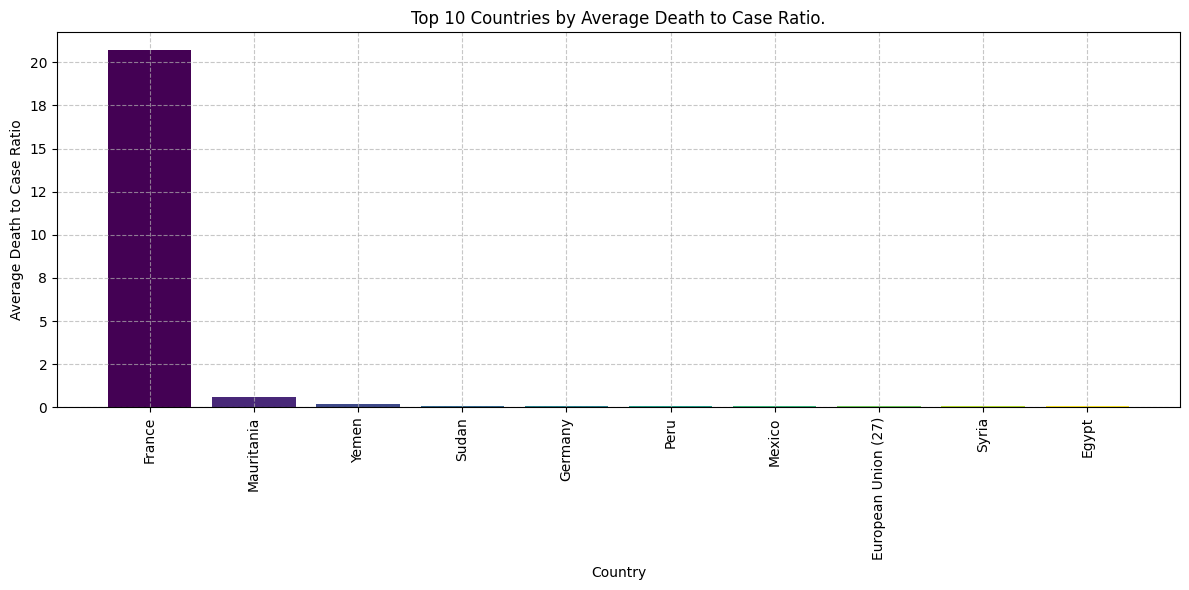

In [60]:
case_vs_deaths = ''' SELECT 
    location,
    AVG(total_cases) AS avg_total_cases,
    AVG(total_deaths) AS avg_total_deaths,
    AVG(total_deaths::FLOAT / NULLIF(total_cases, 0)::FLOAT) AS avg_death_to_case_ratio
FROM 
    covid_data
GROUP BY 
    location
HAVING 
    AVG(total_deaths::FLOAT / NULLIF(total_cases, 0)::FLOAT) IS NOT NULL
order by avg_death_to_case_ratio desc
limit 10
;'''
case_vs_deaths = fetch_data(case_vs_deaths)
case_vs_deaths = case_vs_deaths.fillna(0)

#case_vs_deaths.to_csv(r"D:\study material\projects\SQL_project_covid_19-\files\caseVsdeaths.csv",index=False)


plt.figure(figsize=(12, 6))

plt.figure(figsize=(12, 6))

cmap = plt.get_cmap('viridis')


bars = plt.bar(case_vs_deaths['location'], case_vs_deaths['avg_death_to_case_ratio'], color=cmap(np.linspace(0, 1, len(case_vs_deaths))))

plt.xlabel('Country')
plt.ylabel('Average Death to Case Ratio')
plt.title('Top 10 Countries by Average Death to Case Ratio.')
plt.xticks(rotation=90)  

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()


2. Top 10 Locations by total case  to total population Ratio

In [62]:
query = ''' SELECT
    location,
    avg(total_cases::FLOAT / NULLIF(population, 0)) AS avg_case_to_population_ratio
FROM
    covid_data
WHERE
    total_cases IS NOT NULL AND population IS NOT NULL AND population > 0
group by 
location
ORDER BY
    avg_case_to_population_ratio DESC
limit 10
;

'''
df = fetch_data(query)
#df.to_csv(r'D:\study material\projects\SQL_project_covid_19-\files\casevspopulation.csv',index=False)

Connection closed


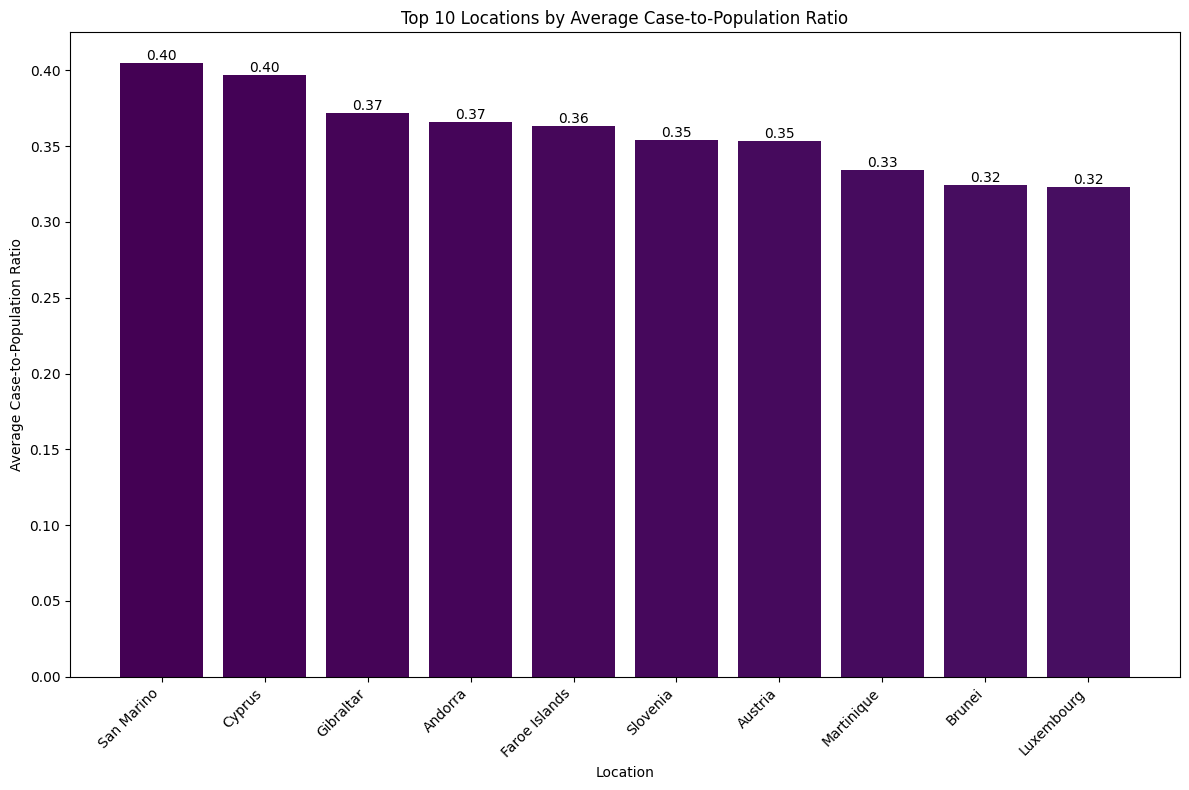

In [63]:
locations = df['location']
ratios = df['avg_case_to_population_ratio']

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(locations, ratios, color=plt.get_cmap('viridis')(range(len(locations))))

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Average Case-to-Population Ratio')
plt.title('Top 10 Locations by Average Case-to-Population Ratio')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add value labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Display the bar chart
plt.tight_layout()
plt.show()

In [64]:
query = ''' select location,date,population,total_cases,(total_cases::float/population::float)*100 as death_percentage
from covid_data order by 1,2'''
cases_vs_population = fetch_data(query)
cases_vs_population.to_csv(r'D:\study material\projects\SQL_project_covid_19-\files\casevspopulation.csv',index=False)

d:\study material\projects\SQL_project_covid_19-\connection2.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Connection closed


3. countries with highest infection rate compared to population

In [76]:
query = ''' select date, location,population,max(total_cases)as HighestInfectionCount,max((total_cases::float/population::float))*100 as PercentPopulationInfected from covid_data
WHERE
    total_cases IS NOT NULL AND population IS NOT NULL AND population > 0
group by location,population,date
order by PercentPopulationInfected desc
'''

result = fetch_data(query)
result.to_csv(r'D:\study material\projects\SQL_project_covid_19-\files\countryinfectvspopulation2.csv',index=False)
result

d:\study material\projects\SQL_project_covid_19-\connection2.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Connection closed


,date,location,population,highestinfectioncount,percentpopulationinfected
0,2024-07-28,Cyprus,896007,696410,77.723723
1,2024-07-22,Cyprus,896007,696031,77.681424
2,2024-07-26,Cyprus,896007,696031,77.681424
3,2024-07-21,Cyprus,896007,696031,77.681424
4,2024-07-25,Cyprus,896007,696031,77.681424
...,...,...,...,...,...
408410,2022-03-10,Tuvalu,11335,0,0.000000
408411,2020-07-06,Wallis and Futuna,11596,0,0.000000
408412,2020-01-22,Turks and Caicos Islands,45726,0,0.000000
408413,2020-01-13,Belarus,9534956,0,0.000000


country with highest death count per population 

In [66]:
query = ''' select location,max(total_deaths::int) as TotalDeathCount from covid_data
where total_deaths is not null and continent is not null
group by location
order by TotalDeathCount desc'''
result = fetch_data(query)
result.to_csv(r'D:\study material\projects\SQL_project_covid_19-\files\countrydeathvspopulation.csv',index=False)
result

Connection closed


d:\study material\projects\SQL_project_covid_19-\connection2.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


continents with highest death count per population 

In [67]:
query = ''' select continent,max(total_deaths::int) as TotalDeathCount from covid_data
where total_deaths is not null and continent is not null 
group by continent
order by TotalDeathCount desc'''
result = fetch_data(query)
result.to_csv(r'D:\study material\projects\SQL_project_covid_19-\files\contideathvspopulation.csv',index=False)

Connection closed


d:\study material\projects\SQL_project_covid_19-\connection2.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


global number

In [68]:
query = ''' SELECT
    SUM(new_cases) AS total_new_cases,
    SUM(new_deaths) AS total_new_deaths,
    (SUM(new_deaths::float) / NULLIF(SUM(new_cases), 0)::float) * 100 AS death_percentage
FROM
    covid_data
WHERE
    continent IS NOT NULL
HAVING
    SUM(new_cases) > 0
ORDER BY
    total_new_cases DESC;
'''
result = fetch_data(query)
result.to_csv(r'D:\study material\projects\SQL_project_covid_19-\files\globaldeathvspopulation.csv',index=False)

d:\study material\projects\SQL_project_covid_19-\connection2.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Connection closed


In [53]:
query = ''' select * from covid_vaccination_data'''
fetch_data(query)

d:\study material\projects\SQL_project_covid_19-\connection2.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Connection closed


,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,OWID_EUN,None,European Union (27),2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
1,OWID_EUN,None,European Union (27),2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
2,OWID_EUN,None,European Union (27),2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
3,OWID_EUN,None,European Union (27),2020-03-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
4,OWID_EUN,None,European Union (27),2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426551,OWID_EUN,None,European Union (27),2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
426552,OWID_EUN,None,European Union (27),2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
426553,OWID_EUN,None,European Union (27),2020-03-10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
426554,OWID_EUN,None,European Union (27),2020-03-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN


Total people in the world has been vaccinated

In [72]:
query = ''' with popvsvac (continent,location,date,population,new_vaccinations,RollingPeopleVaccinated) as
(select death.continent,death.location,death.date,death.population,vaccin.new_vaccinations,
sum(vaccin.new_vaccinations::numeric) over (partition by death.location order by death.location,death.date) 
as RollingPeopleVaccinated
from covid_data death 
join covid_vaccination_data vaccin on death.location = vaccin.location and 
death.date = vaccin.date 
where  death.continent is not null 
order by death.continent,death.location,death.date)

select *,(RollingPeopleVaccinated::numeric/population::numeric)*100 as populationVSvaccin  from popvsvac

'''
result = fetch_data(query)
result =  result.fillna(0)

result.to_csv(r'D:\study material\projects\SQL_project_covid_19-\files\peoplevaccinated.csv',index=False)

Connection closed


In [55]:
query = ''' DROP TABLE IF EXISTS public.percentPopulationVaccinated;
-- Create the table to store the data
CREATE TABLE public.percentPopulationVaccinated
(
    continent VARCHAR(255),
    location VARCHAR(255),
    date TIMESTAMP,
    population NUMERIC,
    new_vaccinations NUMERIC,
    RollingPeopleVaccinated NUMERIC
);

-- Insert data into the table with a rolling sum of new vaccinations
INSERT INTO public.percentPopulationVaccinated
SELECT 
    death.continent,
    death.location,
    death.date,
    death.population,
    vaccin.new_vaccinations,
    SUM(vaccin.new_vaccinations::NUMERIC) OVER (PARTITION BY death.location ORDER BY death.location, death.date) 
    AS RollingPeopleVaccinated
FROM 
    covid_data death 
JOIN 
    covid_vaccination_data vaccin 
ON 
    death.location = vaccin.location 
    AND death.date = vaccin.date 
WHERE 
    death.continent IS NOT NULL 
ORDER BY 
    death.continent, death.location, death.date;

-- Select data from the table and calculate the percentage of the population vaccinated
SELECT *,
       (RollingPeopleVaccinated::NUMERIC / population::NUMERIC) * 100 AS populationVSvaccin  
FROM public.percentPopulationVaccinated;

'''
fetch_data(query)

d:\study material\projects\SQL_project_covid_19-\connection2.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Connection closed


,continent,location,date,population,new_vaccinations,rollingpeoplevaccinated,populationvsvaccin
0,Africa,Algeria,2020-01-05,44903228.0,NaN,NaN,NaN
1,Africa,Algeria,2020-01-06,44903228.0,NaN,NaN,NaN
2,Africa,Algeria,2020-01-07,44903228.0,NaN,NaN,NaN
3,Africa,Algeria,2020-01-08,44903228.0,NaN,NaN,NaN
4,Africa,Algeria,2020-01-09,44903228.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
402904,South America,Venezuela,2024-07-24,28301700.0,NaN,NaN,NaN
402905,South America,Venezuela,2024-07-25,28301700.0,NaN,NaN,NaN
402906,South America,Venezuela,2024-07-26,28301700.0,NaN,NaN,NaN
402907,South America,Venezuela,2024-07-27,28301700.0,NaN,NaN,NaN
